##Install dependencies and import SCFP Data

In [ ]:
!pip install ISLP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from ISLP import load_data

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , cut_tree
from ISLP.cluster import compute_linkage

In [ ]:
file_name = 'SCFP2022.xlsx'
df = pd.read_excel(file_name)

df_a = df

##Scale and Normalize ONLY if necessary

In [ ]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


##Clean Data and Summarize

In [ ]:
# prompt: get summary statistics for each of the X and Y dataframes above without e notation

X = df[(df['LEVRATIO'] < 2) & (df['DEBT2INC'] < 2) & (df['PIRTOTAL'] > 0.01)][['DEBT2INC','LEVRATIO','PIRTOTAL']]
X = X[(X['LEVRATIO'] > 0) & (X['DEBT2INC'] > 0) & (X['PIRTOTAL'] > 0.01)][['DEBT2INC','LEVRATIO','PIRTOTAL']]
#Y = df[(df['LEVRATIO'] < 1) & (df['DEBT2INC'] < 1)][['LEVRATIO']]
#Z = df[(df['LEVRATIO'] < 1) & (df['DEBT2INC'] < 1)][['PIRTOTAL']]


print("Summary statistics for X:")
print(X.describe().apply(lambda s: s.apply('{0:.4f}'.format)))



Summary statistics for X:
         DEBT2INC    LEVRATIO    PIRTOTAL
count  10370.0000  10370.0000  10370.0000
mean       0.7232      0.2647      0.1263
std        0.5636      0.3095      0.1203
min        0.0025      0.0001      0.0100
25%        0.2225      0.0529      0.0533
50%        0.5892      0.1550      0.1019
75%        1.1568      0.3684      0.1653
max        1.9993      1.9982      2.2830


In [ ]:
X.describe().apply(lambda s: s.apply('{0:.4f}'.format))

,DEBT2INC,LEVRATIO,PIRTOTAL
count,10370.0000,10370.0000,10370.0000
mean,0.7232,0.2647,0.1263
std,0.5636,0.3095,0.1203
min,0.0025,0.0001,0.0100
25%,0.2225,0.0529,0.0533
50%,0.5892,0.1550,0.1019
75%,1.1568,0.3684,0.1653
max,1.9993,1.9982,2.2830


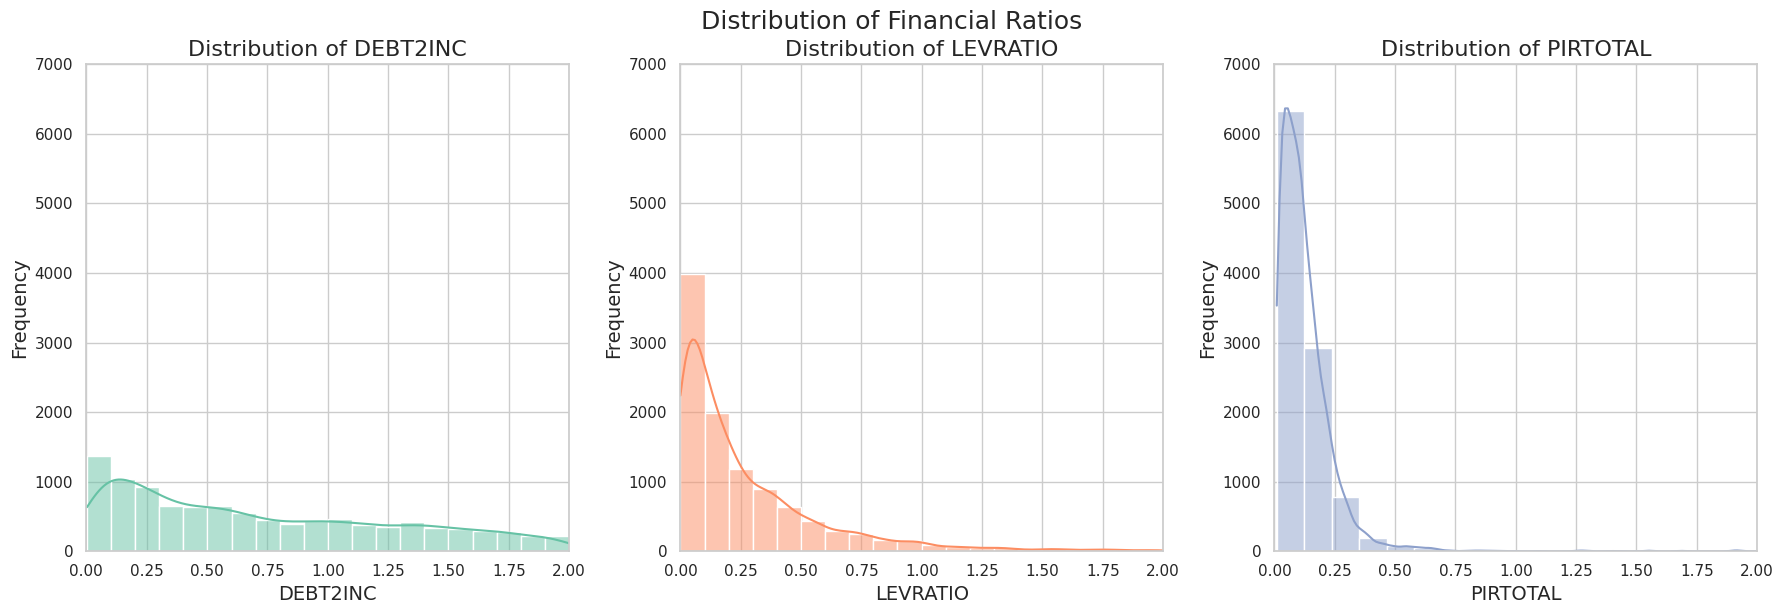

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your dataframe that includes the relevant columns
# Replace this with the actual dataframe loading method, e.g., pd.read_csv() if using a CSV file
# df = pd.read_csv('your_data.csv')

AA = df[(df['LEVRATIO'] < 2) & (df['DEBT2INC'] < 2) & (df['PIRTOTAL'] > 0.01)][['DEBT2INC','LEVRATIO','PIRTOTAL']]
AA = AA[(AA['LEVRATIO'] > 0) & (AA['DEBT2INC'] > 0) & (AA['PIRTOTAL'] > 0.01)][['DEBT2INC','LEVRATIO','PIRTOTAL']]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a list of the columns you want to plot
columns_to_plot = ['DEBT2INC', 'LEVRATIO', 'PIRTOTAL']

# Create the figure and axes objects
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Loop through the columns and create a distribution plot for each
for i, col in enumerate(columns_to_plot):
    sns.histplot(AA[col], bins=20, kde=True, color=sns.color_palette("Set2")[i], ax=axes[i])
    axes[i].set_xlim(0,  2)  # Limit the x-axis between 0 and 2
    axes[i].set_ylim(0, 7000)  # Limit the x-axis between 0 and 2
    axes[i].set_title(f'Distribution of {col}', fontsize=16)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].set_ylabel('Frequency', fontsize=14)

# Improve the layout and appearance
plt.tight_layout()

# Add a title for the whole figure
fig.suptitle('Distribution of Financial Ratios', fontsize=18, y=1.02)

# Show the plot
plt.show()

In [ ]:
AA

,DEBT2INC,LEVRATIO,PIRTOTAL
12,0.116743,2.832097e-06,0.011039
190,0.019542,8.871626e-07,0.010229
191,0.027534,5.833398e-07,0.021919
192,0.109219,8.263981e-07,0.035739
193,0.029513,1.190985e-06,0.011507
...,...,...,...
22035,0.026042,4.783515e-09,0.022110
22036,0.026042,4.774747e-09,0.022110
22037,0.026042,4.797646e-09,0.022110
22038,0.026042,4.854888e-09,0.022110


##K-Means Implementation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import plotly.graph_objects as go

kmeans = KMeans(n_clusters=5,random_state=2,n_init=20).fit(X)

# Add the cluster labels to the DataFrame X
X['Cluster'] = kmeans.labels_

# Extract the cluster centers
centers = kmeans.cluster_centers_

# Create the 3D scatter plot using plotly
fig = go.Figure()
discrete_colors = ['#636EFA', '#EF553B', '#00CC96','#DFCC46','#AAC396']  # You can add more colors if you have more clusters

# Add the data points for each cluster
fig.add_trace(go.Scatter3d(
    x=X['DEBT2INC'],
    y=X['LEVRATIO'],
    z=X['PIRTOTAL'],
    mode='markers',
    marker=dict(
        size=6,
        color=[discrete_colors[i] for i in X['Cluster']],  # Map each cluster to a specific color
        opacity=0.8
    ),
    name='Data Points'
))

for cluster_label in np.unique(X['Cluster']):
    fig.add_trace(go.Scatter3d(
        x=X[X['Cluster'] == cluster_label]['DEBT2INC'],
        y=X[X['Cluster'] == cluster_label]['LEVRATIO'],
        z=X[X['Cluster'] == cluster_label]['PIRTOTAL'],
        mode='markers',
        marker=dict(
            size=6,
            color=discrete_colors[cluster_label],  # Assign a specific color to each cluster
            opacity=0.8
        ),
        name=f'Cluster {cluster_label + 1}'  # Legend label for each cluster
    ))

# Add the cluster centers to the plot
fig.add_trace(go.Scatter3d(
    x=centers[:, 0],
    y=centers[:, 1],
    z=centers[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='black',
        symbol='x',
        opacity=1
    ),
    name='Cluster Centers'
))

# Update the layout to make it adjustable and interactive
fig.update_layout(
    scene=dict(
        xaxis_title='Debt to Income',
        yaxis_title='Debt to Assets',
        zaxis_title='Debt Service',
    ),
    title='Interactive 3D KMeans Clustering',
    height=700,
    width=900
)

# Show the interactive plot
fig.show()

df['Cluster'] = pd.Series(kmeans.labels_, index=X.index)

YESFINRISK_cluster_mapping = df[['YESFINRISK', 'Cluster']]
cluster_YESFINRISK_summary = df.groupby('Cluster')['YESFINRISK'].describe()
cluster_YESFINRISK_summary

NETWORTH_cluster_mapping = df[['NETWORTH', 'Cluster']]
cluster_NETWORTH_summary = df.groupby('Cluster')['NETWORTH'].describe()
cluster_NETWORTH_summary


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,936.0,0.000234,0.000008,0.000202,0.000232,0.000234,0.000237,0.000307
1.0,2018.0,0.003431,0.016159,0.000234,0.000372,0.000584,0.001303,0.255701
2.0,3575.0,0.004841,0.026670,0.000233,0.000247,0.000341,0.001164,0.628225
3.0,1592.0,0.002634,0.016736,0.000197,0.000298,0.000390,0.000757,0.314649
4.0,2249.0,0.006327,0.036799,0.000235,0.000341,0.000605,0.002254,0.640759


In [ ]:
cluster_YESFINRISK_summary

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,3261.0,0.049371,0.216675,0.0,0.0,0.0,0.0,1.0
1.0,1434.0,0.046025,0.209613,0.0,0.0,0.0,0.0,1.0
2.0,2361.0,0.047014,0.211714,0.0,0.0,0.0,0.0,1.0
3.0,2208.0,0.058877,0.235447,0.0,0.0,0.0,0.0,1.0
4.0,1106.0,0.069620,0.254621,0.0,0.0,0.0,0.0,1.0


In [ ]:
cluster_NETWORTH_summary

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,3261.0,1.175053e+07,6.646385e+07,150.0,40300.0,296200.0,2455600.0,1.499857e+09
1.0,1434.0,6.381101e+06,4.207012e+07,-29550.0,173300.0,446790.0,1387800.0,7.509319e+08
2.0,2361.0,7.119116e+06,3.788961e+07,-4960.0,282300.0,733350.0,2205120.0,6.101450e+08
3.0,2208.0,1.465185e+07,8.792933e+07,4990.0,244202.5,901250.0,4884525.0,1.529792e+09
4.0,1106.0,5.085799e+03,2.696196e+04,-85110.0,-1875.0,3465.0,10635.0,4.651000e+05


##Hierarchical

In [ ]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

X = df[(df['LEVRATIO'] < 2) & (df['DEBT2INC'] < 2) & (df['PIRTOTAL'] > 0.01)][['DEBT2INC','LEVRATIO','PIRTOTAL']]
X = X[(X['LEVRATIO'] > 0) & (X['DEBT2INC'] > 0) & (X['PIRTOTAL'] > 0.01)][['DEBT2INC','LEVRATIO','PIRTOTAL']]


model = AgglomerativeClustering(n_clusters=5, linkage='complete')
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)


# Add the cluster labels to the DataFrame X
X['Cluster'] = yhat

# Extract the cluster centers
centers = kmeans.cluster_centers_

# Create the 3D scatter plot using plotly
fig = go.Figure()
discrete_colors = ['#636EFA', '#EF553B', '#00CC96','#DFCC46','#AAC396']  # You can add more colors if you have more clusters

# Add the data points for each cluster
fig.add_trace(go.Scatter3d(
    x=X['DEBT2INC'],
    y=X['LEVRATIO'],
    z=X['PIRTOTAL'],
    mode='markers',
    marker=dict(
        size=6,
        color=[discrete_colors[i] for i in X['Cluster']],  # Map each cluster to a specific color
        opacity=0.8
    ),
    name='Data Points'
))

for cluster_label in np.unique(X['Cluster']):
    fig.add_trace(go.Scatter3d(
        x=X[X['Cluster'] == cluster_label]['DEBT2INC'],
        y=X[X['Cluster'] == cluster_label]['LEVRATIO'],
        z=X[X['Cluster'] == cluster_label]['PIRTOTAL'],
        mode='markers',
        marker=dict(
            size=6,
            color=discrete_colors[cluster_label],  # Assign a specific color to each cluster
            opacity=0.8
        ),
        name=f'Cluster {cluster_label + 1}'  # Legend label for each cluster
    ))

# Add the cluster centers to the plot
fig.add_trace(go.Scatter3d(
    x=centers[:, 0],
    y=centers[:, 1],
    z=centers[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='black',
        symbol='x',
        opacity=1
    ),
    name='Cluster Centers'
))

# Update the layout to make it adjustable and interactive
fig.update_layout(
    scene=dict(
        xaxis_title='Debt to Income',
        yaxis_title='Debt to Assets',
        zaxis_title='Debt Service',
    ),
    title='Interactive Agglomerative Clustering',
    height=700,
    width=900
)

# Show the interactive plot
fig.show()

df['Cluster'] = pd.Series(yhat, index=X.index)

YESFINRISK_cluster_mapping = df[['YESFINRISK', 'Cluster']]
cluster_YESFINRISK_summary = df.groupby('Cluster')['YESFINRISK'].describe()

NETWORTH_cluster_mapping = df[['NETWORTH', 'Cluster']]
cluster_NETWORTH_summary = df.groupby('Cluster')['NETWORTH'].describe()



In [ ]:
cluster_YESFINRISK_summary

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,19.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1.0,4122.0,0.051674,0.221395,0.0,0.0,0.0,0.0,1.0
2.0,327.0,0.036697,0.188306,0.0,0.0,0.0,0.0,1.0
3.0,5793.0,0.055066,0.228130,0.0,0.0,0.0,0.0,1.0
4.0,109.0,0.009174,0.095783,0.0,0.0,0.0,0.0,1.0


In [ ]:
cluster_NETWORTH_summary

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0.0,19.0,1.065895e+05,1.692774e+05,-13230.0,-7205.0,-4280.0,94500.0,4.651000e+05
1.0,4122.0,8.603941e+06,4.640978e+07,3471.0,306832.5,809500.0,2741200.0,7.764832e+08
2.0,327.0,2.834457e+04,7.044083e+04,-85110.0,-11275.0,4650.0,56040.0,3.068100e+05
3.0,5793.0,1.055728e+07,7.034861e+07,-9900.0,23160.0,235200.0,1819100.0,1.529792e+09
4.0,109.0,-8.825890e+03,8.869147e+03,-64238.0,-10850.0,-5420.0,-4000.0,-2.700000e+02
